Step 1: read dataset for XOR and construct tables

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def xor_net(inputs):
    '''simulates a network with two inputs, two hidden nodes and one output node'''
    global dataset_array 
    dataset_array = np.array(inputs)

    global input_x 
    input_x = np.array([np.nan,np.nan,1])
    global output_hidden 
    output_hidden = np.array([np.nan,np.nan,1])

    global weights_h1 
    weights_h1 = np.array([np.random.rand(),np.random.rand(),np.random.rand()])
    global weights_h2
    weights_h2 = np.array([np.random.rand(),np.random.rand(),np.random.rand()])
    global weights_o
    weights_o = np.array([np.random.rand(),np.random.rand(),np.random.rand()])

In [3]:
inputs = [[0,1,1],[1,0,1],[1,1,0],[0,0,0]]
xor_net(inputs)

Step 2: for each epoch we train (forward and backward stages) and test (only forward stage) the NN

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def mse(sum_epoch_error,patterns):
    return sum_epoch_error / patterns

def forwardPass():
    global output_hidden
    output_hidden[0] = sigmoid(np.dot(input_x,np.transpose(weights_h1)))
    output_hidden[1] = sigmoid(np.dot(input_x,np.transpose(weights_h2)))
    global y_pred
    y_pred = sigmoid(np.dot(output_hidden,np.transpose(weights_o)))

def backwardPass1():
    derivatives[2] = y_pred * (1-y_pred) * (y_pred-desired_output)
    derivatives[0] = output_hidden[0] * (1-output_hidden[0]) * (weights_o[0]*derivatives[2])
    derivatives[1] = output_hidden[1] * (1-output_hidden[1]) * (weights_o[1]*derivatives[2])

def backwardPass2():
    global weights_h1
    global weights_h2
    global weights_o
    weights_h1 = weights_h1 - LEARNING_RATE * derivatives[0] * input_x
    weights_h2 = weights_h2 - LEARNING_RATE * derivatives[1] * input_x
    weights_o = weights_o - LEARNING_RATE * derivatives[2] * output_hidden

def vizual(error_training, error_testing):
    # first plot : training error
    plt.plot(error_training)
    
    # second plot : testing error
    plt.plot(error_testing)

    plt.legend(['training error','testing error'])
    plt.xlabel("EPOCHS")
    plt.ylabel("MSE")
    plt.title('MSE over the EPOCHS')
    plt.show()

In [7]:
maxIter = 2000
patterns = 4
LEARNING_RATE = 0.4

error_training = np.zeros(maxIter)
error_testing = np.zeros(maxIter)
success_training = np.zeros(maxIter)
success_testing = np.zeros(maxIter)

for i in range(maxIter):
    # print('TRAINING STARTS . . . ')
    # print('EPOCH: {}'.format(i+1))

    epoch_successcount = 0
    epoch_error = np.empty(patterns)

    # training
    for p in range(patterns):
        input_x[0] = dataset_array[p][0]
        input_x[1] = dataset_array[p][1]
        desired_output = dataset_array[p][2]
        y_pred = 0.0

        forwardPass()

        derivatives = np.array([np.nan,np.nan,np.nan])
        backwardPass1()

        backwardPass2()

        epoch_error[p] = (y_pred- desired_output) ** 2
        if (((desired_output==1) and (y_pred>0.5)) or ((desired_output==0) and (y_pred<0.5))):
            epoch_successcount+=1

    # calculate training error
    error_training[i] = mse(np.sum(epoch_error),patterns)
    success_training[i] = epoch_successcount
    # print('error training = {}'.format(error_training[i]))
    # print('success training = {}'.format(epoch_successcount))
    # print('--------------------------------------')



    # print('TESTING STARTS . . . ')
    # print('EPOCH: {}'.format(i+1))

    epoch_successcount = 0
    epoch_error = np.empty(patterns)

    # testing
    for p in range(patterns):
        input_x[0] = dataset_array[p][0]
        input_x[1] = dataset_array[p][1]
        desired_output = dataset_array[p][2]
        y_pred = 0.0

        forwardPass()

        epoch_error[p] = (desired_output - y_pred) ** 2
        if (((desired_output==1) and (y_pred>0.5)) or ((desired_output==0) and (y_pred<0.5))):
            epoch_successcount+=1

    # calculate testing error
    error_testing[i] = np.sum(epoch_error) / patterns
    success_testing[i] = epoch_successcount
    # print('error testing = {}'.format(error_testing[i]))
    # print('success testing = {}'.format(epoch_successcount))
    # print('--------------------------------------')

Vizualization

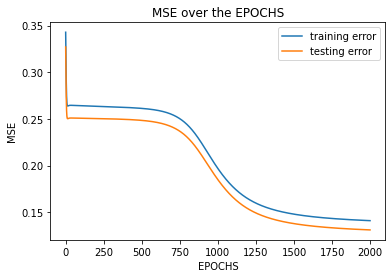

In [8]:
vizual(error_training, error_testing)

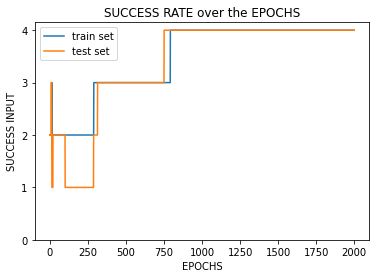

In [16]:
import matplotlib.pyplot as plt

# first plot : training error
plt.plot(success_training)
  
# second plot : testing error
plt.plot(success_testing)
  
plt.legend(['train set','test set'])
plt.yticks([0,1,2,3,4])
plt.xlabel("EPOCHS")
plt.ylabel("SUCCESS INPUT")
plt.title('SUCCESS RATE over the EPOCHS')
plt.show()

Lazy approach: training stops when we reach 100% instead of applying it for a constant number of epochs

In [17]:
maxIter = 2000
patterns = 4
LEARNING_RATE = 0.4

error_training = np.zeros(maxIter)
error_testing = np.zeros(maxIter)

for i in range(maxIter):
    # print('TRAINING STARTS . . . ')
    # print('EPOCH: {}'.format(i+1))

    epoch_successcount = 0
    epoch_error = np.empty(patterns)

    # training
    for p in range(patterns):
        input_x[0] = dataset_array[p][0]
        input_x[1] = dataset_array[p][1]
        desired_output = dataset_array[p][2]
        y_pred = 0.0

        forwardPass()

        derivatives = np.array([np.nan,np.nan,np.nan])
        backwardPass1()

        backwardPass2()

        epoch_error[p] = (desired_output - y_pred) ** 2
        if (((desired_output==1) and (y_pred>0.5)) or ((desired_output==0) and (y_pred<0.5))):
            epoch_successcount+=1

    # calculate training error
    # error_training[i] = mse(np.sum(epoch_error),patterns)
    # print('error training = {}'.format(error_training[i]))
    # print('success training = {}'.format(epoch_successcount))
    # print('--------------------------------------')


    if epoch_successcount == 4:
        break

    # print('TESTING STARTS . . . ')
    # print('EPOCH: {}'.format(i+1))

    epoch_successcount = 0
    epoch_error = np.empty(patterns)

    # testing
    for p in range(patterns):
        input_x[0] = dataset_array[p][0]
        input_x[1] = dataset_array[p][1]
        desired_output = dataset_array[p][2]
        y_pred = 0.0

        forwardPass()

        epoch_error[p] = (desired_output - y_pred) ** 2
        if (((desired_output==1) and (y_pred>0.5)) or ((desired_output==0) and (y_pred<0.5))):
            epoch_successcount+=1

    # calculate testing error
    # error_testing[i] = np.sum(epoch_error) / patterns
    # print('error testing = {}'.format(error_testing[i]))
    # print('success testing = {}'.format(epoch_successcount))
    # print('--------------------------------------')

print('{} total iterations needed so as to train my model'.format(i))

0 total iterations needed so as to train my model


Change learning rate

In [18]:
maxIter = 1000
patterns = 4

error_training = np.zeros(maxIter)
error_testing = np.zeros(maxIter)

for LEARNING_RATE in [0.25,0.5,0,75]:
    print('LEARNING RATE = {}'.format(LEARNING_RATE))
    for i in range(maxIter):
        print('TRAINING STARTS . . . ')
        print('EPOCH: {}'.format(i+1))

        epoch_successcount = 0
        epoch_error = np.empty(patterns)

        # training
        for p in range(patterns):
            input_x[0] = dataset_array[p][0]
            input_x[1] = dataset_array[p][1]
            desired_output = dataset_array[p][2]
            y_pred = 0.0

            forwardPass()

            derivatives = np.array([np.nan,np.nan,np.nan])
            backwardPass1()

            backwardPass2()

            epoch_error[p] = (desired_output - y_pred) ** 2
            if (((desired_output==1) and (y_pred>0.5)) or ((desired_output==0) and (y_pred<0.5))):
                epoch_successcount+=1

        # calculate training error
        error_training[i] = mse(np.sum(epoch_error),patterns)
        print('error training = {}'.format(error_training[i]))
        print('success training = {}'.format(epoch_successcount))
        print('--------------------------------------')



        print('TESTING STARTS . . . ')
        print('EPOCH: {}'.format(i+1))

        epoch_successcount = 0
        epoch_error = np.empty(patterns)

        # testing
        for p in range(patterns):
            input_x[0] = dataset_array[p][0]
            input_x[1] = dataset_array[p][1]
            desired_output = dataset_array[p][2]
            y_pred = 0.0

            forwardPass()

            epoch_error[p] = (desired_output - y_pred) ** 2
            if (((desired_output==1) and (y_pred>0.5)) or ((desired_output==0) and (y_pred<0.5))):
                epoch_successcount+=1

        # calculate testing error
        error_testing[i] = np.sum(epoch_error) / patterns
        print('error testing = {}'.format(error_testing[i]))
        print('success testing = {}'.format(epoch_successcount))
        print('--------------------------------------')

    print('END LEARNING RATE = {}'.format(LEARNING_RATE))
    print('*******************************************')

LEARNING RATE = 0.25
TRAINING STARTS . . . 
EPOCH: 1
error training = 0.003971593183969292
success training = 4
--------------------------------------
TESTING STARTS . . . 
EPOCH: 1
error testing = 0.0039580244127112325
success testing = 4
--------------------------------------
TRAINING STARTS . . . 
EPOCH: 2
error training = 0.003969055074139818
success training = 4
--------------------------------------
TESTING STARTS . . . 
EPOCH: 2
error testing = 0.003955503081599829
success testing = 4
--------------------------------------
TRAINING STARTS . . . 
EPOCH: 3
error training = 0.003966520080066666
success training = 4
--------------------------------------
TESTING STARTS . . . 
EPOCH: 3
error testing = 0.003952984844442097
success testing = 4
--------------------------------------
TRAINING STARTS . . . 
EPOCH: 4
error training = 0.003963988193479094
success training = 4
--------------------------------------
TESTING STARTS . . . 
EPOCH: 4
error testing = 0.003950469692858208
success t

Change initial weights

In [19]:
maxIter = 2000
patterns = 4
LEARNING_RATE = 0.4

error_training = np.zeros(maxIter)
error_testing = np.zeros(maxIter)

for i in range(2):
    if i==0:
        weights_h1 = np.array([0,0,0])
        weights_h2 = np.array([0,0,0])
        weights_o = np.array([0,0,0])
        print('weights are all zeros!')
    else:
        weights_h1 = np.array([0.5,0.5,0.5])
        weights_h2 = np.array([0.5,0.5,0.5])
        weights_o = np.array([0.5,0.5,0.5])
        print('weights are all the same (0.5)!')
        
    for i in range(maxIter):
        print('TRAINING STARTS . . . ')
        print('EPOCH: {}'.format(i+1))

        epoch_successcount = 0
        epoch_error = np.empty(patterns)

        # training
        for p in range(patterns):
            input_x[0] = dataset_array[p][0]
            input_x[1] = dataset_array[p][1]
            desired_output = dataset_array[p][2]
            y_pred = 0.0

            forwardPass()

            derivatives = np.array([np.nan,np.nan,np.nan])
            backwardPass1()

            backwardPass2()

            epoch_error[p] = (desired_output - y_pred) ** 2
            if (((desired_output==1) and (y_pred>0.5)) or ((desired_output==0) and (y_pred<0.5))):
                epoch_successcount+=1

        # calculate training error
        error_training[i] = mse(np.sum(epoch_error),patterns)
        print('error training = {}'.format(error_training[i]))
        print('success training = {}'.format(epoch_successcount))
        print('--------------------------------------')



        print('TESTING STARTS . . . ')
        print('EPOCH: {}'.format(i+1))

        epoch_successcount = 0
        epoch_error = np.empty(patterns)

        # testing
        for p in range(patterns):
            input_x[0] = dataset_array[p][0]
            input_x[1] = dataset_array[p][1]
            desired_output = dataset_array[p][2]
            y_pred = 0.0

            forwardPass()

            epoch_error[p] = (desired_output - y_pred) ** 2
            if (((desired_output==1) and (y_pred>0.5)) or ((desired_output==0) and (y_pred<0.5))):
                epoch_successcount+=1

        # calculate testing error
        error_testing[i] = np.sum(epoch_error) / patterns
        print('error testing = {}'.format(error_testing[i]))
        print('success testing = {}'.format(epoch_successcount))
        print('--------------------------------------')

weights are all zeros!
TRAINING STARTS . . . 
EPOCH: 1
error training = 0.2591729528200766
success training = 1
--------------------------------------
TESTING STARTS . . . 
EPOCH: 1
error testing = 0.25000677451462555
success testing = 2
--------------------------------------
TRAINING STARTS . . . 
EPOCH: 2
error training = 0.2591845524442741
success training = 1
--------------------------------------
TESTING STARTS . . . 
EPOCH: 2
error testing = 0.25002350568626197
success testing = 2
--------------------------------------
TRAINING STARTS . . . 
EPOCH: 3
error training = 0.2592031920727941
success training = 1
--------------------------------------
TESTING STARTS . . . 
EPOCH: 3
error testing = 0.2500460387821659
success testing = 2
--------------------------------------
TRAINING STARTS . . . 
EPOCH: 4
error training = 0.25922557270775715
success training = 1
--------------------------------------
TESTING STARTS . . . 
EPOCH: 4
error testing = 0.2500714998711897
success testing = 2
-

---

General code + try ReLU

In [ ]:
def relu(x):
    return max(0,x)

def forwardPass():
    global output_hidden
    output_hidden[0] = relu(np.dot(input_x,np.transpose(weights_h1)))
    output_hidden[1] = relu(np.dot(input_x,np.transpose(weights_h2)))
    global y_pred
    y_pred = sigmoid(np.dot(output_hidden,np.transpose(weights_o)))

In [7]:
# standard version
maxIter = 2000
patterns = 4
LEARNING_RATE = 0.4

error_training = np.zeros(maxIter)
error_testing = np.zeros(maxIter)

def relu(x):
    return max(0,x)

def forwardPass():
    global output_hidden
    output_hidden[0] = relu(np.dot(input_x,np.transpose(weights_h1)))
    output_hidden[1] = relu(np.dot(input_x,np.transpose(weights_h2)))
    global y_pred
    y_pred = sigmoid(np.dot(output_hidden,np.transpose(weights_o)))

for i in range(maxIter):
    print('TRAINING STARTS . . . ')
    print('EPOCH: {}'.format(i+1))

    epoch_successcount = 0
    epoch_error = np.empty(patterns)

    # training
    for p in range(patterns):
        input_x[0] = dataset_array[p][0]
        input_x[1] = dataset_array[p][1]
        desired_output = dataset_array[p][2]
        y_pred = 0.0

        forwardPass()

        derivatives = np.array([np.nan,np.nan,np.nan])
        backwardPass1_relu()

        backwardPass2_relu()

        epoch_error[p] = (desired_output - y_pred) ** 2
        if (((desired_output==1) and (y_pred>0.5)) or ((desired_output==0) and (y_pred<0.5))):
            epoch_successcount+=1

    # calculate training error
    error_training[i] = mse(np.sum(epoch_error),patterns)
    print('error training = {}'.format(error_training[i]))
    print('success training = {}'.format(epoch_successcount))
    print('--------------------------------------')



    print('TESTING STARTS . . . ')
    print('EPOCH: {}'.format(i+1))

    epoch_successcount = 0
    epoch_error = np.empty(patterns)

    # testing
    for p in range(patterns):
        input_x[0] = dataset_array[p][0]
        input_x[1] = dataset_array[p][1]
        desired_output = dataset_array[p][2]
        y_pred = 0.0

        forwardPass()

        epoch_error[p] = (desired_output - y_pred) ** 2
        if (((desired_output==1) and (y_pred>0.5)) or ((desired_output==0) and (y_pred<0.5))):
            epoch_successcount+=1

    # calculate testing error
    error_testing[i] = np.sum(epoch_error) / patterns
    print('error testing = {}'.format(error_testing[i]))
    print('success testing = {}'.format(epoch_successcount))
    print('--------------------------------------')

TRAINING STARTS . . . 
EPOCH: 1
error training = 0.3373098343024057
success training = 2
--------------------------------------
TESTING STARTS . . . 
EPOCH: 1
error testing = 0.2602647278487783
success testing = 2
--------------------------------------
TRAINING STARTS . . . 
EPOCH: 2
error training = 0.283438906391459
success training = 2
--------------------------------------
TESTING STARTS . . . 
EPOCH: 2
error testing = 0.2514421007985153
success testing = 2
--------------------------------------
TRAINING STARTS . . . 
EPOCH: 3
error training = 0.276192081307437
success training = 2
--------------------------------------
TESTING STARTS . . . 
EPOCH: 3
error testing = 0.25073555910083833
success testing = 2
--------------------------------------
TRAINING STARTS . . . 
EPOCH: 4
error training = 0.2750371277289211
success training = 2
--------------------------------------
TESTING STARTS . . . 
EPOCH: 4
error testing = 0.25104140794401425
success testing = 2
---------------------------

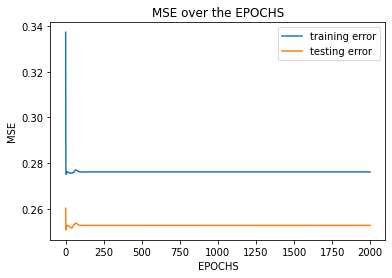

In [8]:
vizual(error_training, error_testing)